## Import dependencies

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error  # MAE => Mean absolute error regression loss
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

## Load data

In [4]:
df = pd.read_excel("../data/raw/entrenamiento.xlsx")
df = df.rename(columns={"C7.1": "C8", "des": "QUALITY"})
features = df.drop(columns=["QUALITY"])
target = df["QUALITY"]

## Dataframe without NaN values

In [7]:
df_without_nan = df.dropna()
df_features_without_nan = df_without_nan.drop(columns=["QUALITY"])

In [8]:
# Randomly fill NaN values
# Copy of the features dataframe
features_fill_nan = df_features_without_nan.copy()

# Calculate the percentage of NaN values in each column of the original data
nan_percentages_original = df.isna().mean() * 100

# Apply custom percentages of NaN values to each column
np.random.seed(0)

for col in features_fill_nan:
    mask = np.random.rand(features_fill_nan.shape[0]) < (nan_percentages_original[col] / 100)
    features_fill_nan.loc[mask, col] = np.nan

features_fill_nan

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,6.8,0.190620,0.307485,18.1,46.00,32.0,4.897840,1.00000,3.27,0.392042,8.8
2,6.7,0.350657,0.329304,12.1,0.04,61.0,5.517453,0.99794,3.31,0.457425,9.7
3,6.8,0.254642,0.405465,13.3,53.00,48.0,5.273000,0.99740,3.09,0.371564,9.4
4,6.6,0.215111,0.239017,15.8,35.00,46.0,5.241747,0.99820,3.24,0.412110,9.2
5,6.7,NaN,0.215111,2.7,17.00,NaN,4.394449,0.99084,3.03,0.314811,11.5
...,...,...,...,...,...,...,...,...,...,...,...
3909,6.6,4.454347,0.285179,1.4,36.00,17.0,4.700480,0.99306,3.27,0.476234,9.5
3910,7.0,0.148420,0.223144,14.3,44.00,27.0,NaN,998.00000,2.91,0.378436,9.2
3914,8.1,0.378436,0.270027,1.7,52.00,50.0,5.214936,0.99230,3.03,0.350657,11.2
3915,6.1,0.148420,0.254642,6.0,0.03,29.0,4.976734,0.99474,3.68,0.378436,10.7


## Imputation of missing values using Median

In [12]:
df_imputed_median = features_fill_nan.fillna(features_fill_nan.median())

df_imputed_median

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,6.8,0.190620,0.307485,18.1,46.00,32.0,4.897840,1.00000,3.27,0.392042,8.8
2,6.7,0.350657,0.329304,12.1,0.04,61.0,5.517453,0.99794,3.31,0.457425,9.7
3,6.8,0.254642,0.405465,13.3,53.00,48.0,5.273000,0.99740,3.09,0.371564,9.4
4,6.6,0.215111,0.239017,15.8,35.00,46.0,5.241747,0.99820,3.24,0.412110,9.2
5,6.7,0.239017,0.215111,2.7,17.00,33.0,4.394449,0.99084,3.03,0.314811,11.5
...,...,...,...,...,...,...,...,...,...,...,...
3909,6.6,4.454347,0.285179,1.4,36.00,17.0,4.700480,0.99306,3.27,0.476234,9.5
3910,7.0,0.148420,0.223144,14.3,44.00,27.0,4.919981,998.00000,2.91,0.378436,9.2
3914,8.1,0.378436,0.270027,1.7,52.00,50.0,5.214936,0.99230,3.03,0.350657,11.2
3915,6.1,0.148420,0.254642,6.0,0.03,29.0,4.976734,0.99474,3.68,0.378436,10.7


## Dataframe with rows with NaN values

In [ ]:
# Dataframe with missing values
df_with_nan = df[df.isna().any(axis=1)]
df_features_with_nan = df_with_nan.drop(columns=["QUALITY"])
df_features_with_nan

### Imputation of missing values using Median

In [13]:
df_missing_median = df_features_with_nan.fillna(df_features_with_nan.median())

df_missing_median

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
1,6.2,0.246860,0.277632,5.00,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8
6,9.2,0.536493,0.207014,6.20,42.00,15.0,4.543295,0.99480,3.18,0.292670,10.1
7,6.4,4.836282,0.254642,5.85,42.00,24.0,4.605170,992.00000,3.23,0.277632,10.3
10,6.9,0.182322,0.307485,1.50,31.00,38.0,4.997212,0.99310,3.18,0.444686,11.0
13,4.4,0.378436,0.095310,2.80,41.00,31.0,4.718499,0.98816,3.48,0.292670,13.1
...,...,...,...,...,...,...,...,...,...,...,...
3908,8.0,0.246860,0.350657,7.10,45.00,41.0,5.135798,0.99590,3.17,0.385262,10.6
3911,6.1,0.231112,0.148420,1.30,0.06,36.0,4.844187,0.99353,3.13,0.378436,8.7
3912,6.6,0.223144,0.270027,5.10,35.00,32.0,4.852030,0.99210,3.41,0.385262,11.3
3913,7.7,0.231112,0.215111,11.20,31.00,41.0,5.123964,0.99480,3.12,0.357674,11.3


## Imputation comparative in both dataframes

In [15]:
stats_median_imputed = df_imputed_median.describe()
stats_missing_imputed = df_missing_median.describe()

# Difference in statistics
stats_difference = stats_median_imputed - stats_missing_imputed

stats_difference

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
count,-342.000000,-342.000000,-342.000000,-342.000000,-342.000000,-342.000000,-342.000000,-342.000000,-342.000000,-342.000000,-342.000000
mean,0.038163,0.015627,0.000049,0.179235,0.643410,-0.281909,0.002127,-10.084154,0.002738,0.002801,0.011913
std,-0.006238,0.042320,0.002542,-0.085045,1.874699,1.405444,0.041664,-18.922547,0.007550,-0.000141,0.031200
min,-0.100000,-0.018349,0.000000,-0.100000,0.000000,0.000000,-0.916291,0.001080,0.020000,-0.016129,0.400000
25%,0.000000,0.000000,0.000000,0.137500,-1.000000,-1.000000,-0.002242,-0.000020,-0.010000,0.000000,0.000000
50%,0.000000,0.007905,-0.007605,0.400000,1.000000,-1.000000,0.014706,0.000165,0.000000,0.006780,0.000000
75%,0.100000,0.000000,0.007273,0.725000,1.000000,2.000000,0.036368,0.000048,0.012500,0.006515,0.000000
max,-2.400000,-0.104698,-0.108854,-34.200000,45.000000,150.500000,0.182322,-2.000000,-0.010000,-0.034233,0.000000


## Imputation comparative plots

/tmp/ipykernel_47494/2082562176.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_imputed_median[column], label='Data without missing', shade=True)
/tmp/ipykernel_47494/2082562176.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_missing_median[column], label='Missing Data', shade=True)
/tmp/ipykernel_47494/2082562176.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_imputed_median[column], label='Data without missing', shade=True)
/tmp/ipykernel_47494/2082562176.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please up

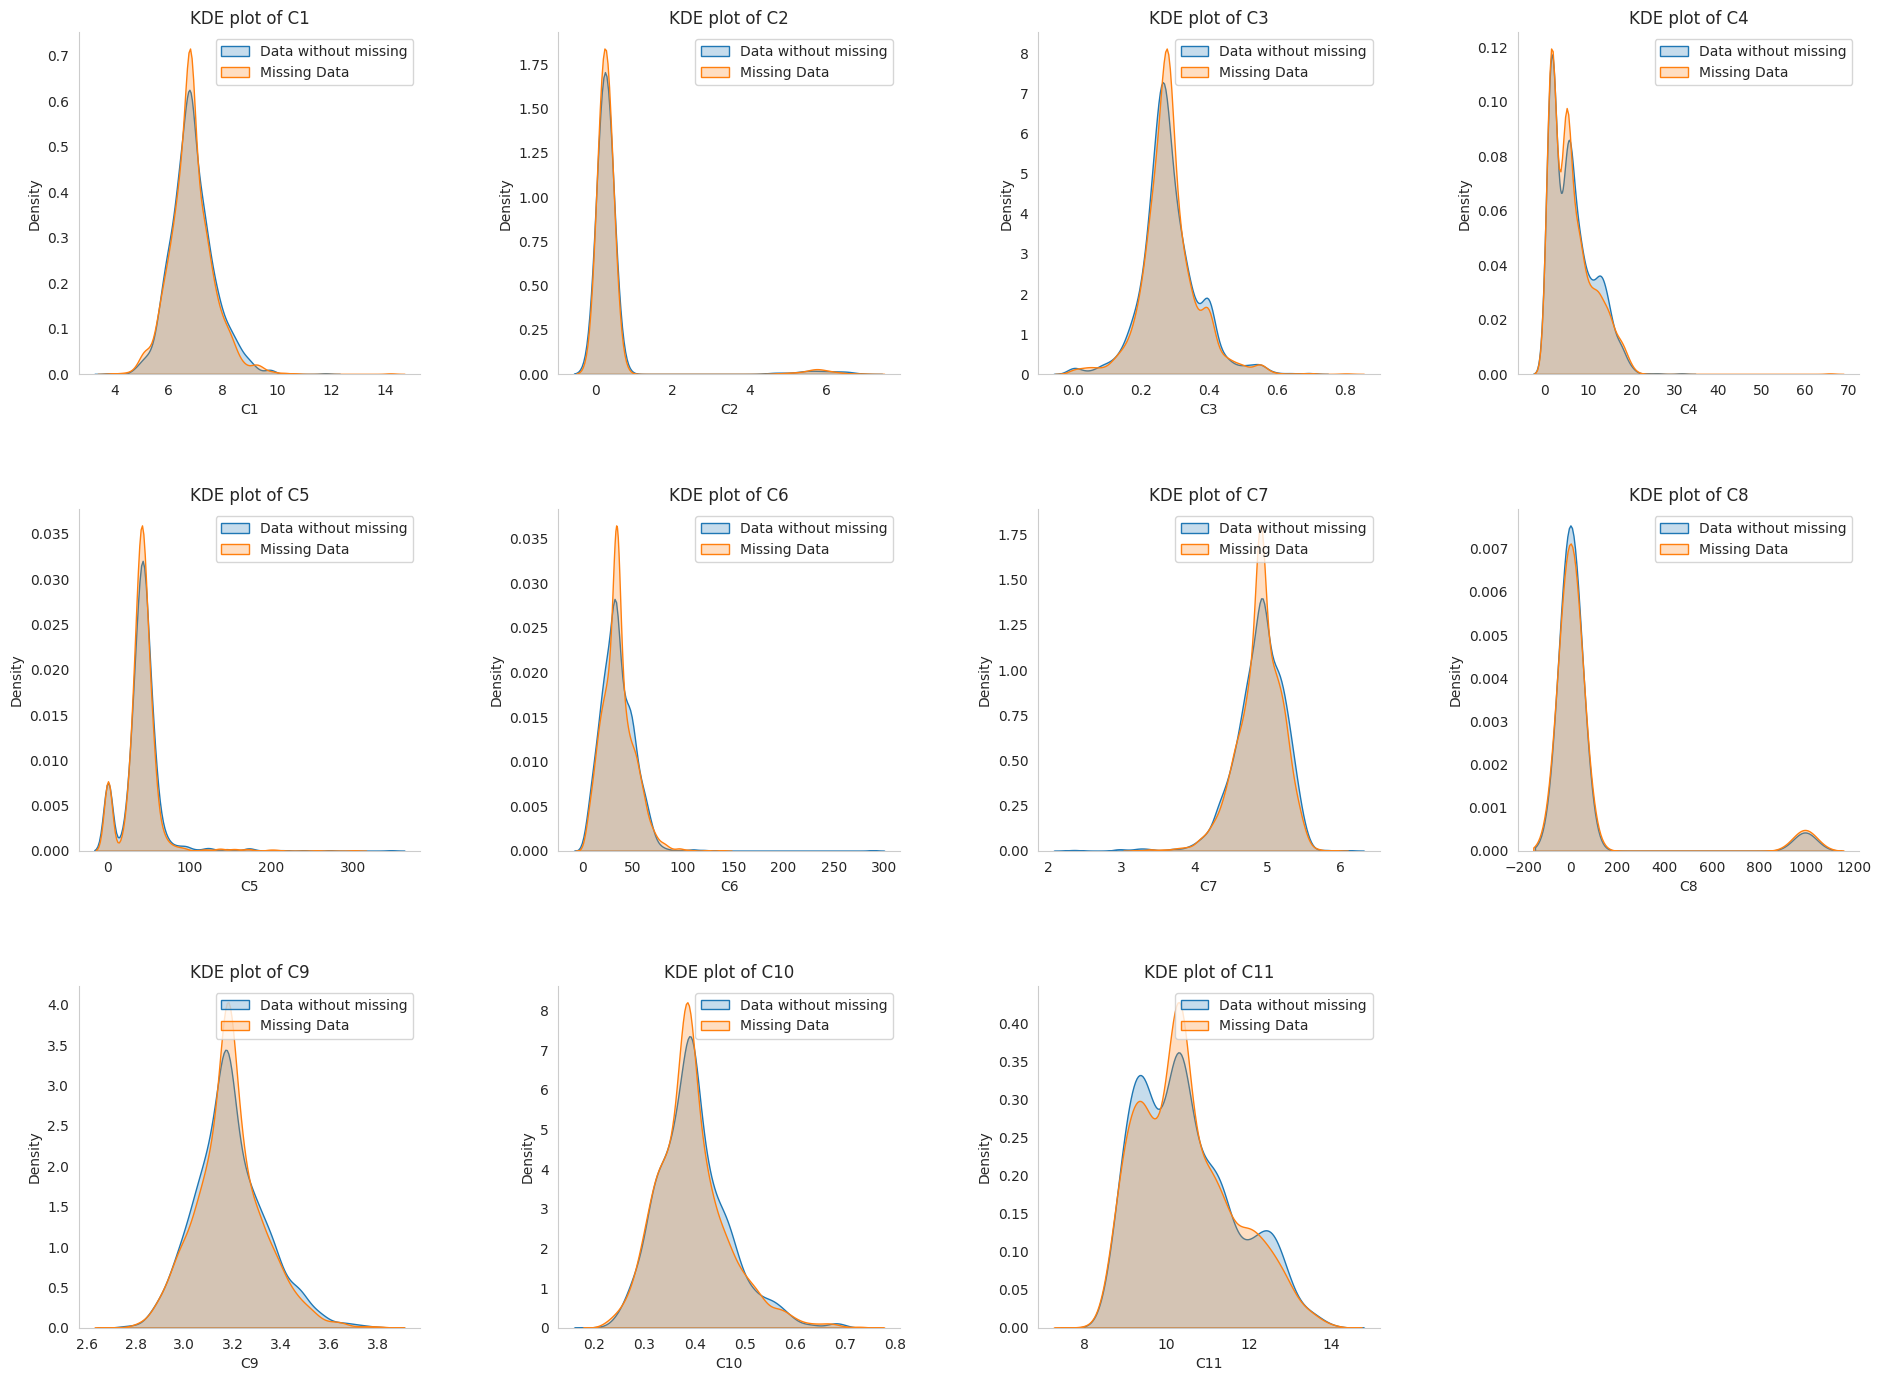

In [27]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df_missing_median.columns, 1):
    plt.subplot(3, 4, i)
    sns.kdeplot(df_imputed_median[column], label='Data without missing', shade=True)
    sns.kdeplot(df_missing_median[column], label='Missing Data', shade=True)
    plt.title(f"KDE plot of {column}")
    plt.legend(loc="upper right")
    plt.tight_layout(pad=5)
    sns.despine()
    plt.grid(False)

plt.show()